,Ca_salicilico,v_da_hija,V_agua,Absorbancia
0,10,1,9,0.156
1,20,2,8,0.192
2,40,4,6,0.351
3,60,6,4,0.492
4,80,8,2,0.648


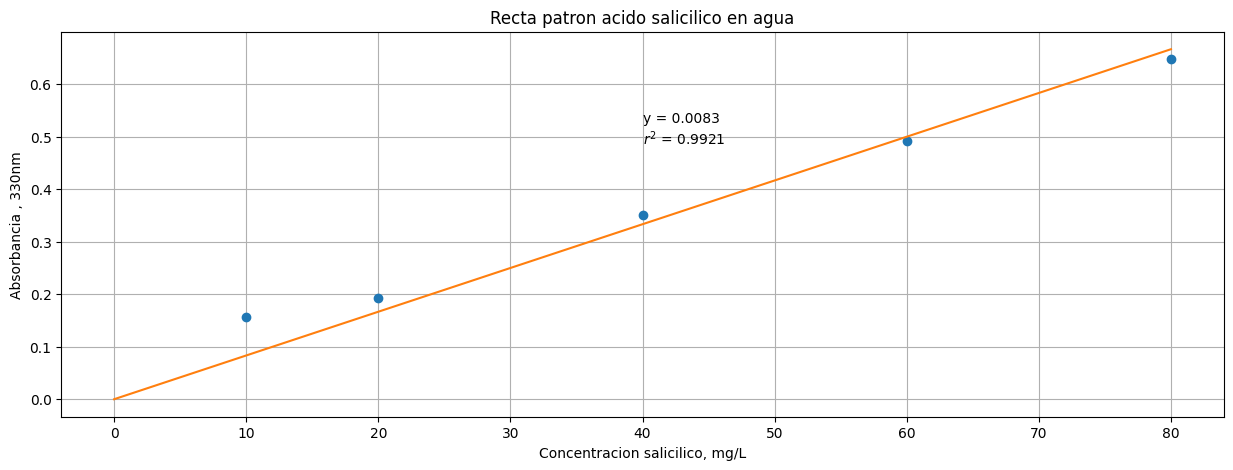

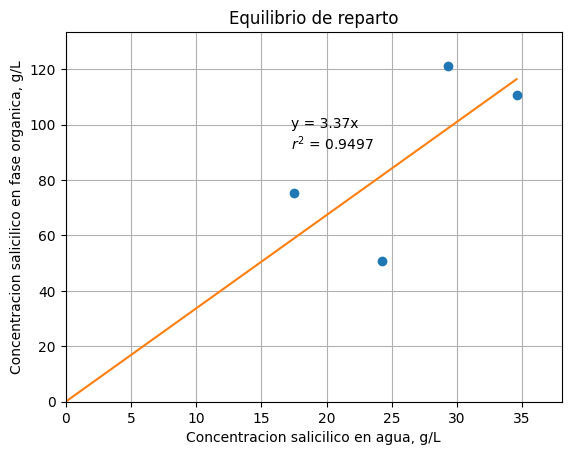

,Sistemas,V.d.madre ml,V agua ml,V.d.org ml,Abs_acu,Abs_org,CV g/L,CL g/L,Coef. Reparto
0,0.2,5.0,20.0,20,0.073,1.749,17.525794,75.387931,4.301542
1,0.3,7.5,17.5,20,0.101,1.177,24.248016,50.732759,2.092244
2,0.4,10.0,15.0,20,0.122,0.703,29.289683,121.206897,4.138211
3,0.5,12.5,12.5,20,0.144,0.641,34.571429,110.517241,3.196780


El valor de KD con la media geometrica es de:  3.3032423999834557


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.stats import linregress
from scipy.stats import gmean
# Fase acuosa

Ca_salicilico = np.array([10,20,40,60,80]) # mg/L
v_da_hija = np.array([1,2,4,6,8]) # mL
V_agua = np.array([9,8,6,4,2]) # mL
Absorbancia = np.array([0.156,0.192,0.351,0.492,0.648]) # Absorbancia

df_acuosa = pd.DataFrame({'Ca_salicilico': Ca_salicilico, 'v_da_hija': v_da_hija, 'V_agua': V_agua, 'Absorbancia': Absorbancia})
display(df_acuosa)

# Fase orgánica
slope1 = np.sum(Ca_salicilico * Absorbancia) / np.sum(Ca_salicilico**2)
y_pred = slope1 * Ca_salicilico

# Calcular r^2 modificado (sin intercepto)
ss_res = np.sum((Absorbancia - y_pred)**2)  # Suma de los residuos al cuadrado
ss_tot = np.sum(Absorbancia**2)  # Usamos el total relativo al origen
r_value1 = 1 - (ss_res / ss_tot)  # r^2 corregido

x_vals = np.linspace(0, max(Ca_salicilico), 100)
plt.figure(figsize=(15,5))
plt.plot(Ca_salicilico, Absorbancia, 'o')
plt.plot(x_vals, slope1 * x_vals, label="Ajuste Lineal (forzado)")
plt.title('Recta patron acido salicilico en agua')
plt.xlabel('Concentracion salicilico, mg/L')
plt.ylabel('Absorbancia , 330nm')
plt.text(max(Ca_salicilico)/2, max(Absorbancia)*0.75, 'y = {0:.4f}\n$r^2$ = {1:.4f}'.format(slope1, r_value1))
plt.grid()



# equilibrio de reparto
slope2 = 0.0232
Sistemas = np.array([0.2,0.3,0.4,0.5]) # g/L
dmadre = np.array([5,7.5,10,12.5]) # mL
V_agua_reparto = np.array([20,17.5,15,12.5]) # mL
V_org_reparto = np.array([20,20,20,20]) # mL
Abs_org = np.array([1.749,1.177,0.703,0.641]) # Absorbancia
Co = (Abs_org / slope2)*np.where(np.arange(len(Abs_org)) < 2, 1, 4)
Abs_acu = np.array([0.073,0.101,0.122,0.144]) # Absorbancia
Ca = (Abs_acu / slope1) * 2

slope3 = np.sum(Ca * Co) / np.sum(Ca**2)
y_pred2 = slope3 * Ca
ss_res2 = np.sum((Co - y_pred2)**2)  # Suma de los residuos al cuadrado
ss_tot2 = np.sum(Co**2)  # Total al cuadrado, relativo al origen
r_value2 = 1 - (ss_res2 / ss_tot2)
xvals2 = np.linspace(0, max(Ca), 100)
KD = Co/Ca
df3 = pd.DataFrame({'Sistemas': Sistemas, 'V.d.madre ml': dmadre, 'V agua ml': V_agua_reparto, 'V.d.org ml': V_org_reparto, 'Abs_acu': Abs_acu, 'Abs_org': Abs_org, 'CV g/L': Ca, 'CL g/L': Co, 'Coef. Reparto': KD})
kd = slope3
plt.figure()
plt.plot(Ca, Co, 'o')
plt.plot(xvals2, slope3 * xvals2, label="Ajuste Lineal forzado")
plt.title('Equilibrio de reparto')
plt.xlabel('Concentracion salicilico en agua, g/L')
plt.ylabel('Concentracion salicilico en fase organica, g/L')
plt.text(max(Ca)/2, max(Co)*0.75, 'y = {0:.2f}x\n$r^2$ = {1:.4f}'.format(slope3, r_value2))
plt.xlim(0, max(Ca) * 1.1)  # Incluir el origen en el eje x
plt.ylim(0, max(Co) * 1.1)  # Incluir el origen en el eje y
plt.grid()
plt.show()
display(df3)
kdfinal = gmean(KD)
print('El valor de KD con la media geometrica es de: ', kdfinal)
print('El valor de KD con el ajuste lineal es de: ', kd)
error = abs(kdfinal - kd) /max(kdfinal, kd) 
print('El error es de: ', error * 100, '%')

